# Checkpoint 1

A partir do dataset carregado (Students Performance), responda:

## Importação e Análise Inicial

**1. Importe o arquivo CSV.(0,33)**  
R: Feito via código.

**2. Quantas linhas tem o dataset?(0,33)**  
R: 1000

**3. Quantas colunas tem o dataset?(0,33)**  
R: 8

**4. Quais colunas têm o tipo `object`?(0,34)**  
R: gender, race/ethnicity, parental level of education, lunch, test preparation course

**5. Quais colunas têm o tipo `int64`?(0,34)**  
R: math score, reading score, writing score

**6. Existe alguma coluna de outro tipo?(0,33)**  
R: Não

## Análise Estatística

**7. Qual foi o total, o máximo, o mínimo das notas de matemática (math score)?(0,66)**  
R: Total: 66095, Máximo: 100, Mínimo: 0

**8. Qual o total, o máximo, o mínimo e o valor que representa 25% das notas de leitura (reading score)?(0,67)**  
R: Total: 69169, Máximo: 100, Mínimo: 17, 25%: 59.0

**9. Qual o total, o máximo, o mínimo e o valor que representa 75% das notas de escrita (writing score)?(0,67)**  
R: Total: 68054, Máximo: 100, Mínimo: 10, 75%: 79.0

## Análise de Categorias

**10. Qual o gênero (gender) mais presente? E quantos valores únicos ele possui?(0,5)**  
R: female (mais presente), valores únicos: 2 (female, male)

**11. Qual o nível de educação parental (parental level of education) mais presente? E quantos valores únicos ela possui?(0,5)**  
R: some college (mais presente), valores únicos: 6

**12. Qual o tipo de almoço (lunch) mais presente? E quantos valores únicos ela possui?(0,5)**  
R: standard (mais presente), valores únicos: 2 (free/reduced, standard)

**13. Execute o processo de dummy na coluna `race/ethnicity`.(0,5)**  
R: Feito via código 

## Análise de Valores Nulos

**14. Qual a quantidade de valores nulos em cada feature?(0,66)**  
R: Todas as colunas têm 0 valores nulos

**15. Qual a proporção de valores nulos por valores não nulos em cada feature?(0,66)**  
R: 0% para todas as features

**16. Faça o tratamento desses nulos e explique por que escolheu cada método.(0,68)**  
R: Não há valores nulos, portanto nenhum tratamento necessário

## Visualização Gráfica

**17. Visualização Gráfica da distribuição das notas de matemática (math score).(2)**  
R: Feito via código 



----------------------------------------
🧩 Desafio: ETL de Dados Públicos

🎯 Objetivo
Construir um pipeline ETL no Apache Airflow que:

Extrai dados de algum dataset público

Transforma os dados limpando, filtrando e unificando informações.

Carrega o resultado em um banco de dados PostgreSQL (ou salva como Parquet).

Agenda a execução diária do pipeline (simulando ingestão incremental).

----------------------------------------

## Importação e Análise Inicial

In [17]:
# Manipulação e visualização de dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas para aprendizado de máquina
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# MLflow para rastreamento de experimentos
import mlflow

# Supressão de avisos
import warnings
warnings.filterwarnings("ignore")

In [18]:
display(df.head())

# Exibir informações sobre o dataset
print(df.info())

# Exibir dimensões do dataset
print('Dimensões:', df.shape)

# Exibir estatísticas básicas
display(df.describe())

# Verificar valores ausentes
display(df.isnull().sum().sort_values(ascending=False))

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,female,bachelor's degree,standard,none,72,72,74,True,False,False,False
1,female,some college,standard,completed,69,90,88,False,True,False,False
2,female,master's degree,standard,none,90,95,93,True,False,False,False
3,male,associate's degree,free/reduced,none,47,57,44,False,False,False,False
4,male,some college,standard,none,76,78,75,False,True,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   parental level of education  1000 non-null   object
 2   lunch                        1000 non-null   object
 3   test preparation course      1000 non-null   object
 4   math score                   1000 non-null   int64 
 5   reading score                1000 non-null   int64 
 6   writing score                1000 non-null   int64 
 7   race/ethnicity_group B       1000 non-null   bool  
 8   race/ethnicity_group C       1000 non-null   bool  
 9   race/ethnicity_group D       1000 non-null   bool  
 10  race/ethnicity_group E       1000 non-null   bool  
dtypes: bool(4), int64(3), object(4)
memory usage: 58.7+ KB
None
Dimensões: (1000, 11)


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


gender                         0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
race/ethnicity_group B         0
race/ethnicity_group C         0
race/ethnicity_group D         0
race/ethnicity_group E         0
dtype: int64

In [19]:
# Execute o processo de dummy na coluna 'race/ethnicity'
if 'race/ethnicity' in df.columns:
    df = pd.get_dummies(df, columns=['race/ethnicity'], drop_first=True)
    print("Dummies aplicados na coluna 'race/ethnicity'.")
else:
    print("Coluna 'race/ethnicity' já foi processada ou não existe.")

# Verificar o dataset após a transformação
display(df.head())

Coluna 'race/ethnicity' já foi processada ou não existe.


,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,female,bachelor's degree,standard,none,72,72,74,True,False,False,False
1,female,some college,standard,completed,69,90,88,False,True,False,False
2,female,master's degree,standard,none,90,95,93,True,False,False,False
3,male,associate's degree,free/reduced,none,47,57,44,False,False,False,False
4,male,some college,standard,none,76,78,75,False,True,False,False


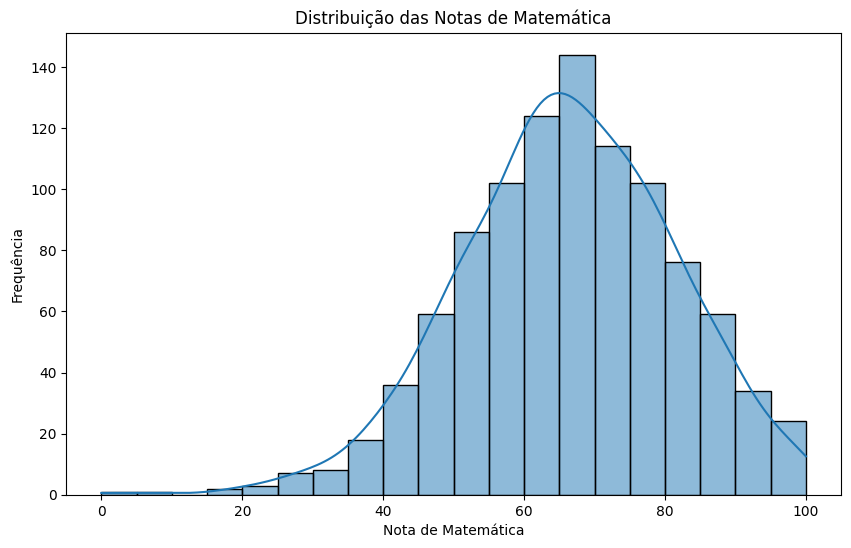

In [20]:
# Visualização Gráfica da distribuição das notas de matemática
plt.figure(figsize=(10, 6))
sns.histplot(df['math score'], bins=20, kde=True)
plt.title('Distribuição das Notas de Matemática')
plt.xlabel('Nota de Matemática')
plt.ylabel('Frequência')
plt.show()